In [ ]:
# Homework 2 Part 1 (due 7/07/2024)
# Author: Warren Shepard
# Collaboration: Sri Korandla, Tushar Aggarwal
# Credit: none

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [ ]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


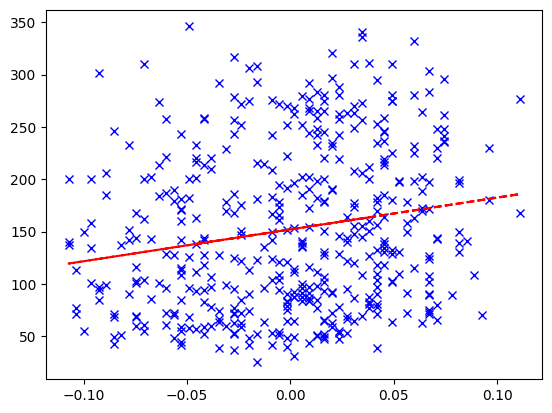

In [ ]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

VARIABLE:  age
R2: 0.03530218264671636
RSS: 2528481.7816048963
MSE: 5720.5470172056475
RSE: 75.6342978892886

VARIABLE:  sex
R2: 0.0018543357106460823
RSS: 2616148.8936170214
MSE: 5918.888899586022
RSE: 76.9343154878629

VARIABLE:  bmi
R2: 0.3439237602253802
RSS: 1719581.8107738825
MSE: 3890.456585461273
RSE: 62.37352471570989

VARIABLE:  bp
R2: 0.1949061431435003
RSS: 2110158.3448469597
MSE: 4774.113902368687
RSE: 69.09496293051099

VARIABLE:  s1
R2: 0.04495353245556555
RSS: 2503185.5056927945
MSE: 5663.315623739354
RSE: 75.25500397807015

VARIABLE:  s2
R2: 0.030294651136685613
RSS: 2541606.5673835794
MSE: 5750.241102677782
RSE: 75.83034420782872

VARIABLE:  s3
R2: 0.15585855244530533
RSS: 2212502.436354108
MSE: 5005.661620710652
RSE: 70.75070049625411

VARIABLE:  s4
R2: 0.18528968598509687
RSS: 2135363.1668038676
MSE: 4831.13838643409
RSE: 69.50639097546419

VARIABLE:  s5
R2: 0.32022310842972057
RSS: 1781701.4353853487
MSE: 4030.998722591287
RSE: 63.490146657503374

VARIABLE:  s6
R2:

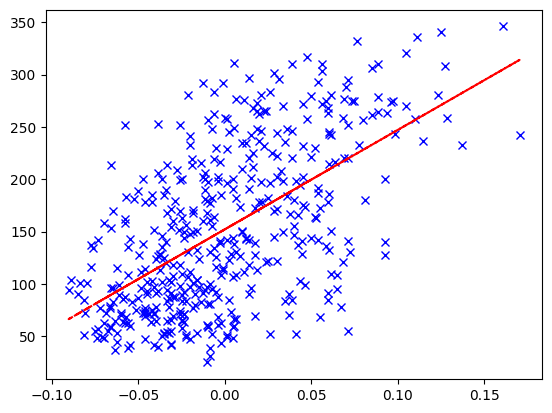

In [ ]:
# Step 2
variableFStatMap = {} # dictionary used to stash f stat for later use
for var in var_names:
  print("VARIABLE: ", var)


  # initialize model
  model = LinearRegression()

  # select data associated with the first variable
  x = X[var]

  # turn that dataframe column into a nx1 numpy array
  x_data = np.array([x.to_numpy()]).T

  # fit model
  _ = model.fit(x_data, y.to_numpy())

  # get model predictions for each x value
  yHat = model.predict(x_data)

  # get residuals
  resid = yHat - y.to_numpy()

  # get RSS, MSE, RSE, R2 values
  R2 = model.score(x_data, y)
  RSS = np.sum(resid**2)
  MSE = RSS/len(y)
  RSE = np.sqrt(MSE)

  # print results
  print('R2:', R2)
  print('RSS:', RSS)
  print('MSE:', MSE)
  print('RSE:', RSE)
  print()
  y_mean = np.mean(y)
  TSS = np.sum((y.to_numpy() - y_mean) ** 2)
  p = X.shape[1]
  ESS = TSS - RSS
  n = len(y)
  variableFStatMap[var] = (ESS/1) / (RSS/(n-1-1)) # stash the f-statistics for later use
  # make a plot: bmi has the best quality fit
  if var == "bmi":
    plt.subplot(111)

    # plot data
    plt.plot(x, y, marker='x', lw=0, color='blue')

    # plot fit
    plt.plot(x, yHat, ls='--', color='red')

In [ ]:
# Step 3: multivariant linear regression model

# initialize model
multivar_model = LinearRegression()

# fit model
_ = multivar_model.fit(X, y.to_numpy())

# make predictions
yHat = multivar_model.predict(X)
resid = yHat - y.to_numpy()
#resid = y.to_numpy() - yHat
y_mean = np.mean(y)
# calculate the within-sample RSS, MSE, RSE, and R^2
RSS = np.sum(resid**2) # residual sum of squares
MSE = RSS/len(y)
RSE = np.sqrt(MSE)
R2 = multivar_model.score(X, y)
TSS = np.sum((y.to_numpy() - y_mean) ** 2)
p = X.shape[1]
print(p) # prints 10
ESS = TSS - RSS

# calculate the f-statisic
n = len(y)
f_stat = (ESS/10) / (RSS/(n-10-1)) # TUSH CHECK THIS BUDDY MAKE SURE THESE MAFS ARE CORRECT
# print the results
print('f_stat:', f_stat)
print('RSS:', RSS)
print('MSE:', MSE)
print('RSE:', RSE) # residual standard error
print('R2:', R2)
print('TSS', TSS)

10
f_stat: 46.27243958524321
RSS: 1263985.7856333435
MSE: 2859.69634758675
RSE: 53.47612876402657
R2: 0.5177484222203499
TSS 2621009.124434389


Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

> Add blockquote



In [ ]:
# Step 4: calculate f statistics with respect to reduced model
# Initialize model
multivar_model = LinearRegression()

# Fit the full model
_ = multivar_model.fit(X, y.to_numpy())
yHat_full = multivar_model.predict(X)
resid_full = y.to_numpy() - yHat_full
RSS_full = np.sum(resid_full**2)

# Number of observations and predictors
n = len(y)
p = X.shape[1]

# Function to fit reduced model
def fit_reduced_model(X_reduced, y):
    model = LinearRegression()
    _ = model.fit(X_reduced, y)
    yHat_reduced = model.predict(X_reduced)
    resid_reduced = y.to_numpy() - yHat_reduced
    RSS_reduced = np.sum(resid_reduced**2)
    return RSS_reduced

# Calculate F-statistic for each variable

# Dictionary to map integer to specific variable (used for visualization of single-variable models)
numToPredictorDict = {}
for i in range (0, 9):
  numToPredictorDict[i+1] = var_names[i]
numToPredictorDict[10] = 's6'

f_stats = []
for i in range(p):
    # Create reduced X by removing the i-th column to form a reduced model with 9 variables
    X_reduced = np.delete(X, i, axis=1)
    RSS_reduced = fit_reduced_model(X_reduced, y)
    F_stat = ((RSS_reduced - RSS_full) / 1) / (RSS_full / (n - p - 1))
    f_stats.append((numToPredictorDict[i+1], F_stat))

# Sort variables by F-statistic
f_stats.sort(key=lambda x: x[1], reverse=True) # sort the f stats in descending order

# Print the results
for i, f_stat in f_stats:
    print(f'Variable {i} F-statistic: {f_stat}')

# for single variable model, we have a dictionary of everything already, so simply sort then print
sorted_items = sorted(variableFStatMap.items(), key=lambda item: item[1], reverse=True)
print(" ")
print("single variable model f-statistics:")
sorted_dict = {key: value for key, value in sorted_items}
for key, value in sorted_dict.items():
    print(f'{key}, F-statistic: {value}')

Variable bmi F-statistic: 61.04769359493474
Variable bp F-statistic: 24.58516062951425
Variable s5 F-statistic: 19.1004988002449
Variable sex F-statistic: 15.34387717868028
Variable s1 F-statistic: 3.6144142390820386
Variable s2 F-statistic: 1.9773514814613802
Variable s4 F-statistic: 1.2023805393336846
Variable s6 F-statistic: 1.0504014225640101
Variable s3 F-statistic: 0.22603116815637952
Variable age F-statistic: 0.028066721652920276
 
single variable model f-statistics:
bmi, F-statistic: 230.65376449412662
s5, F-statistic: 207.2711936170754
bp, F-statistic: 106.52013085528463
s4, F-statistic: 100.06926441335229
s3, F-statistic: 81.23965867875593
s6, F-statistic: 75.39968319740298
s1, F-statistic: 20.71056744632017
age, F-statistic: 16.101374010745623
s2, F-statistic: 13.74607917319076
sex, F-statistic: 0.817423490252953


## The three Variables with the Highest F-Statistics are the same across both multivariate models and single variable models, although in slight different orders. BMI is the first in both models. s5 is third in the multivariate reduced model, but bp is second in the single variable model. This can be due to interaction effects, multi-collineraity, or variable partitioning.


In [ ]:
# Part 5: Parititoning data in learning + training set
from sklearn.model_selection import train_test_split

# split by the input variables (age, sex, bmi, bp, s1, s2, s3) and the target variable represented by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("X_train:\n", X_train)
#print("X_test:\n", X_test)
#print("y_train:\n", y_train)
#print("y_test:\n", y_test)


# Singular Linear Regression: Same Technique as above in step 2
for var in var_names:
  print("VARIABLE: ", var)
  print(" ")
  # initialize model
  model = LinearRegression()

  # select data associated with the first variable
  x = X_train[var]
  x_data = np.array([x.to_numpy()]).T

  # fit model + get predictions
  _ = model.fit(x_data, y_train.to_numpy())
  yHat = model.predict(x_data)

  # get residuals and get RSS, MSE, RSE, R2 values
  resid = yHat - y_train.to_numpy()
  R2 = model.score(x_data, y_train)
  RSS = np.sum(resid**2)
  MSE = RSS/len(y_train)
  RSE = np.sqrt(MSE)

  # print results
  print("For training data:")
  print('R2:', R2)
  print('RSS:', RSS)
  print('MSE:', MSE)
  print('RSE:', RSE)

  # test RSS, MSE, RSE, and R2 for test part:

  x = X_test[var]
  x_data = np.array([x.to_numpy()]).T


  # fit model + get predictions
  _ = model.fit(x_data, y_test.to_numpy())
  yHat = model.predict(x_data)

  # get residuals and get RSS, MSE, RSE, R2 values
  resid = yHat - y_test.to_numpy()
  R2 = model.score(x_data, y_test)
  RSS = np.sum(resid**2)
  MSE = RSS/len(y_test)
  RSE = np.sqrt(MSE)
  print(" ")
  # print results
  print("For test data:")
  print('R2:', R2)
  print('RSS:', RSS)
  print('MSE:', MSE)
  print('RSE:', RSE)

  print("-------------------- ")
  print(" ")



VARIABLE:  age
 
For training data:
R2: 0.0386160540134205
RSS: 2062138.2791851806
MSE: 5841.75149910816
RSE: 76.43135154573783
 
For test data:
R2: 0.021979898436001233
RSS: 461171.2030955259
MSE: 5181.698911185685
RSE: 71.98401844288553
-------------------- 
 
VARIABLE:  sex
 
For training data:
R2: 5.0639903771965145e-05
RSS: 2144859.877585207
MSE: 6076.0903047739575
RSE: 77.94928033518948
 
For test data:
R2: 0.037849924659415835
RSS: 453687.92225609755
MSE: 5097.617104001096
RSE: 71.39759872713574
-------------------- 
 
VARIABLE:  bmi
 
For training data:
R2: 0.3657241273794126
RSS: 1360501.7661827644
MSE: 3854.11265207582
RSE: 62.081500079136454
 
For test data:
R2: 0.2576548957635231
RSS: 350042.0740691774
MSE: 3933.057012013229
RSE: 62.71408942186141
-------------------- 
 
VARIABLE:  bp
 
For training data:
R2: 0.1978207021301397
RSS: 1720649.324146736
MSE: 4874.360691633813
RSE: 69.81662188643772
 
For test data:
R2: 0.17621227299656828
RSS: 388445.1623744476
MSE: 4364.55238

For the single variable regression models, the R2, RSS, MSE, and RSE were all within the same magnitude when comparing the training set to the test set. As the training set is 80% of the original set while the test set is only 20%, there are significant differences, but all statistics are in the same ballpark as each other. Hence the residual sum of squares varied drastically (as it is dependent on the size of the data set, with the test set about a quarter of the training set ), but other normalized statistics were fairly in the same ballpark. R2 for most are within 0.05 of each other, with the biggest difference being in bmi with a 0.11 drop from the training data to test. MSE is in the same ballpark as each other; however, for s5, there is a 1000 point drop between the training and test data, which is a similar trend for s1-6

In [ ]:
# initialize model for Multi-variate Regression
multivar_model = LinearRegression()

# fit model based off of training
_ = multivar_model.fit(X_train, y_train.to_numpy())

# make predictions for training
yHat = multivar_model.predict(X_train)
resid = yHat - y_train.to_numpy()
# calculate the within-sample RSS, MSE, RSE, and R^2
RSS = np.sum(resid**2) # residual sum of squares
MSE = RSS/len(y_train)
RSE = np.sqrt(MSE)
R2 = multivar_model.score(X, y)

# print the results for training

print('Training Results: ')
print('RSS:', RSS)
print('MSE:', MSE)
print('RSE:', RSE)
print('R2:', R2)

# Now fit for test set:
_ = multivar_model.fit(X_test, y_test.to_numpy())

# make predictions for test
yHat = multivar_model.predict(X_test)
resid = yHat - y_test.to_numpy()
# calculate the within-sample RSS, MSE, RSE, and R^2
RSS = np.sum(resid**2) # residual sum of squares
MSE = RSS/len(y_test)
RSE = np.sqrt(MSE)
R2 = multivar_model.score(X, y)

# print the results for training
print(" ")
print('Test Results: ')
print('RSS:', RSS)
print('MSE:', MSE)
print('RSE:', RSE)
print('R2:', R2)


Training Results: 
RSS: 1012598.0451009589
MSE: 2868.5497028355776
RSE: 53.55884336723094
R2: 0.5151809025803763
 
Test Results: 
RSS: 228392.9302755368
MSE: 2566.2126997251326
RSE: 50.657799988996096
R2: 0.48113322611398635


For the multivariate model, We see a similar trend with residual sum of squares of the test about a quarter of the training set, with other statistics in the same ballpark. R2 is within 0.04 of each other, which is fairly close, and the RSE of the training set is 3 points bigger than the RSE of the test set.